# Evaluación de las ejecuciones para la memoria

## Leer la evolución del fitness

In [9]:
import os
import re
import json
import glob


def extract_gen_number(filename):
    match = re.search(r"Gen-(\d+)", filename)
    return int(match.group(1)) if match else float('inf')

filterDirs = sorted(os.listdir("../results"))
results = {}
# outputs = {}
# targets = {}

filtersUsed = []
for d in filterDirs:
    filtersUsed.append(d)
    print(f"Found directory: {d}")
    
# SELECCIONAR ESTE VALOR A MANO PARA EVITAR AGOTAR MEMORIA DEL ORDENADOR
SELECTED_FILTER = 8
chosenFilter = [filtersUsed[SELECTED_FILTER]] 
# chosenFilter = filtersUsed
for d in chosenFilter:
    print(f"Processing directory: {d}")
    results[d] = {}
    # outputs[d] = {}
    # targets[d] = {}

    sortedExecutions = sorted(os.listdir("../results/" + d), key=lambda x: int(x))
    
    for execution in sortedExecutions:
        print(f"  - Processing execution: {execution}")
        results[d][execution] = []
        # outputs[d][execution] = []
        # targets[d][execution] = []
        
        executionDir = "../results/" + d + "/" + execution
        
        for file in sorted(glob.glob(os.path.join(executionDir, "*.json")), key=extract_gen_number):
            if re.match(r".*Gen.*\.json$", file):
                with open(file, 'r') as f:
                    try:
                        data = json.load(f)
                    except json.JSONDecodeError: # skip files that are not valid JSON
                        print(f"Skipping {execution} in {d} due to JSON decode error.")
                        continue
                    results[d][execution].append(data["fitness"])
                    # outputs[d][execution].append(data["output"])
            # elif re.match(r".*TARGET\.json$", file):
                # with open(os.path.join(executionDir, file), 'r') as f:
                    # try:
                        # data = json.load(f)
                    # except json.JSONDecodeError:
                        # print(f"Skipping TARGET in {execution} of {d} due to JSON decode error.")
                        # continue
                    # targets[d][execution].append(data["Target"])

Found directory: ALL_PASS_FILTER_4
Found directory: BIQUAD_LOWSHELF_3293_HZ
Found directory: BIQUAD_PEAK_440_HZ
Found directory: BIQUAD_PEAK_7753_HZ
Found directory: FEEDBACK_COMB_FILTER_TOPOLOGY_1_ORDER_48
Found directory: FEEDBACK_COMB_FILTER_TOPOLOGY_1_ORDER_7
Found directory: FEEDBACK_COMB_FILTER_TOPOLOGY_2_ORDER_11
Found directory: FEEDBACK_COMB_FILTER_TOPOLOGY_2_ORDER_4
Found directory: LOWPASS_33_TAPS
Processing directory: LOWPASS_33_TAPS
  - Processing execution: 1
  - Processing execution: 2
  - Processing execution: 3
  - Processing execution: 4
  - Processing execution: 5
  - Processing execution: 6
  - Processing execution: 7
  - Processing execution: 8
  - Processing execution: 9


KeyboardInterrupt: 

## Gráficas de la evolución del fitness

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import os

os.makedirs("graphs", exist_ok=True)

font_path = '/home/javi/Escritorio/PFG/fonts/texgyrepagella-regular.otf'
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['font.serif'] = prop.get_name()
plt.rcParams['pdf.fonttype'] = 42  # for embedding fonts in PDF
plt.rcParams['ps.fonttype'] = 42


if os.path.exists(font_path):
    try:
        font_manager.fontManager.addfont(font_path)
        custom_font_prop = font_manager.FontProperties(fname=font_path)
        font_family = custom_font_prop.get_name()
        plt.rcParams['font.family'] = font_family
        print(f"Successfully set font to: {font_family}")
        
    except Exception as e:
        print(f"Failed to load font: {e}\nUsing default font.")
else:
    print(f"Font file not found: {font_path}\nUsing default font.")
        
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = False  # Disable LaTeX rendering
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for r in chosenFilter:
    print(f"Fitness over Generations for {r}")
    plt.figure(figsize=(10, 5))
    for i, (execution, fitness) in enumerate(results[r].items()):
        generations = np.arange(len(fitness))
        plt.plot(generations, fitness, label=f"E{execution}", color=colors[i % len(colors)])
    plt.xlabel("Generación")
    numGens = max(len(fitness) for fitness in results[r].values())
    plt.xlim(0, numGens - 1)
    plt.ylabel("Fitness")
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.grid(True)
    # plt.savefig(f"graphs/{r}_fitness.png", dpi=300, bbox_inches='tight')

Successfully set font to: TeX Gyre Pagella


NameError: name 'chosenFilter' is not defined

In [ ]:
from scipy import fft
np.set_printoptions(linewidth=120, precision=3, suppress=True)

if False:
    for i, t in enumerate(targets):
        for j, e in enumerate(targets[t]):
            expected = np.array(targets[t][e][0], dtype=np.float64)
            readOutput = np.array(outputs[t][e][-1], dtype=np.float64)
            
            L = len(expected)
            n = np.arange(0, L, 1)
            
            print(expected)
            print(readOutput)
            
            print(f"Expected: {expected.shape}, Read Output: {readOutput.shape}")
            # TIME DOMAIN PLOT
            plt.figure(figsize=(12, 5))
            plt.rc('font', family='serif')
            # plt.rc('text', usetex=True)
            plt.rcParams.update({'font.size': 12})
            plt.rcParams['figure.dpi'] = 100

            plt.plot(n, expected, '-', color='blue', linewidth=1.2)
            plt.plot(n, readOutput, '--', color='red', linewidth=1.2)
            plt.legend([
                "Expected",
                "Simulated",
                ])
            plt.grid('both')
            plt.xlabel("Time [samples]")
            plt.xlim([0, 50])
            # plt.xlim([0, L-1])
            plt.ylabel("Output")
            plt.show()
            
            # FFT PLOT
            yf_expected = fft.fft(expected, L)
            yf_readOutput = fft.fft(readOutput, L)

            plt.figure(figsize=(10, 5))

            plt.subplot(2, 1, 1)
            plt.minorticks_on()
            plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
            plt.grid(which='major', linestyle='-', linewidth='0.75', color='black')
            plt.semilogx(20*np.log10(np.abs(yf_expected)), '-', color='blue', linewidth=1.2)
            plt.semilogx(20*np.log10(np.abs(yf_readOutput)), '--', color='red', linewidth=1.2)
            plt.xlabel("Frequency [Hz] (log scale)")
            plt.xlim([0, L])
            plt.ylabel("Magnitude [dB]")
            plt.title("FFT of the output signal")
            plt.legend(["Expected", "Simulated", "JSON"])

            plt.subplot(2, 1, 2)
            plt.semilogx(np.angle(yf_expected), '-', color='blue', linewidth=1.2)
            plt.semilogx(np.angle(yf_readOutput), '--', color='red', linewidth=1.2)
            plt.yticks(np.arange(-np.pi, np.pi + np.pi/2, np.pi/2), 
                    [r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
            plt.ylabel("Phase [rad]")
            plt.ylim([-np.pi, np.pi])
            plt.grid()
            plt.xlabel("Frequency [Hz] (log scale)")
            plt.xlim([0, L])

            plt.legend(["Expected", "Simulated", "JSON"], loc="lower left")
            plt.tight_layout()
            plt.show()
            plt.close()


## Print the fitness of each generation sorted for each execution system

In [ ]:
type_layer = {}
value_layer = {}

for r in chosenFilter:
    fitness_list = []
    for execution, fitness in results[r].items():
        if fitness:
            highest_fitness = max(fitness)
            fitness_list.append((execution, highest_fitness))
        else:
            fitness_list.append((execution, None))
    # Sort by execution index (convert to int for sorting)
    fitness_list.sort(key=lambda x: int(x[0]))

    executions = [x[0] for x in fitness_list]
    fitnesses = [f"{x[1]:.3f}" if x[1] is not None else "No data" for x in fitness_list]

    # Calculate column widths
    col_widths = [max(len(exec), len(fit)) for exec, fit in zip(executions, fitnesses)]

    print(f"\nHighest fitness for {r}:")
    exec_row = "Execution: " + "  ".join(exec.rjust(w) for exec, w in zip(executions, col_widths))
    fit_row  = "Fitness:   " + "  ".join(fit.rjust(w) for fit, w in zip(fitnesses, col_widths))
    print(exec_row)
    print(fit_row)

    # Now, for each execution in sorted order, get the corresponding gen_file
    for execution, highest_fitness in fitness_list:
        if highest_fitness is not None:
            gen_files = sorted(os.listdir(f"../results/{r}/{execution}"), key=extract_gen_number)
            for gen_file in gen_files:
                if re.match(r".*Gen.*\.json$", gen_file):
                    filename = os.path.join(f"../results/{r}/{execution}", gen_file)
                    with open(filename, 'r') as f:
                        try:
                            data = json.load(f)
                            if data["fitness"] == highest_fitness:
                                name = r + "_" + execution + "_" + gen_file
                                print(f"name: {name}")
                                value_layer[name] = data["value_layer"]
                                type_layer[name] = data["type_layer"]
                                break
                        except json.JSONDecodeError:
                            print(f"Skipping {gen_file} in {execution} of {r} due to JSON decode error.")
                            continue

    # No need to reorder at the end, as everything is processed in sorted order



Highest fitness for LOWPASS_33_TAPS:
Execution:     1      2      3      4      5      6      7      8      9     10
Fitness:   0.974  0.968  0.328  0.938  0.954  0.328  0.927  0.894  0.972  0.328
name: LOWPASS_33_TAPS_1_results_Gen-5892.json
name: LOWPASS_33_TAPS_2_results_Gen-8532.json
name: LOWPASS_33_TAPS_3_results_Gen-778.json
name: LOWPASS_33_TAPS_4_results_Gen-3142.json
name: LOWPASS_33_TAPS_5_results_Gen-5565.json
name: LOWPASS_33_TAPS_6_results_Gen-767.json
name: LOWPASS_33_TAPS_7_results_Gen-5704.json
name: LOWPASS_33_TAPS_8_results_Gen-4331.json
name: LOWPASS_33_TAPS_9_results_Gen-6185.json
name: LOWPASS_33_TAPS_10_results_Gen-658.json


## Plotting the best results



In [ ]:
numGains = {}
memoryUsed = {}
numAdditions = {}
numDelays = {}

execution_labels = []

print("\nType and Value Layers:")
for key in type_layer:
    # Extract execution name from key to get fitness
    # key format: '{filterUsed}_{execution}_{gen_file}'
    # Find filterUsed by checking if any filter name is a substring in key
    filterUsed = next((f for f in filtersUsed if f in key), None)
    # Extract execution name from key (it's the part after filterUsed and before the next '_')
    execution = None
    if filterUsed is not None:
        rest = key[len(filterUsed) + 1:]  # skip filterUsed and '_'
        execution = rest.split('_')[0]
        print(f"Execution extracted: {execution}")
    # Find the fitness for this execution
    fitness_for_execution = None
    for r in chosenFilter:
        if execution in results[r]:
            fitness_for_execution = max(results[r][execution]) if results[r][execution] else None
            break
    # Skip if fitness is not available or less than 0.9
    if fitness_for_execution is None or fitness_for_execution < 0.6:
        print(f"Skipping {key} due to insufficient fitness: {fitness_for_execution}")
        continue
    
    execution_labels.append(f"E{execution} {fitness_for_execution:.3f}")

    print(f"{key}")
    types = type_layer[key]
    values = value_layer[key]
    
    print(f"Filter used: {filterUsed}")
    
    N = int(len(types) ** 0.5)
    print(N)
    type_matrix = np.array(types).reshape((N, N))
    value_matrix = np.array(values).reshape((N, N))
    
    numGains_LOCAL = np.sum(type_matrix == 1)
    print(f"Number of gains:     {numGains_LOCAL}")
    
    delaysMask = (type_matrix == 2)
    memoryUsed_LOCAL = np.sum(delaysMask * value_matrix)
    print(f"Memory used:         {int(memoryUsed_LOCAL)}")

    # Calculate number of delays for this key
    numDelays_LOCAL = int(np.sum(type_matrix == 2))
    print(f"Number of delays:    {numDelays_LOCAL}")
    
    numAdditions_LOCAL = 0
    for col in range(N):
        column = type_matrix[:, col] != 0
        numAdditions_LOCAL += max(0, np.sum(column) - 1)
    if np.any(type_matrix[:, 0] != 0):
        numAdditions_LOCAL += 1
    print(f"Number of additions: {numAdditions_LOCAL}")
    
    # Add to dictionaries
    if filterUsed not in memoryUsed:
        memoryUsed[filterUsed] = []
    if filterUsed not in numGains:
        numGains[filterUsed] = []
    if filterUsed not in numAdditions:
        numAdditions[filterUsed] = []
    if filterUsed not in numDelays:
        numDelays[filterUsed] = []
        
    memoryUsed[filterUsed].append(int(memoryUsed_LOCAL))
    numGains[filterUsed].append(int(numGains_LOCAL))
    numAdditions[filterUsed].append(int(numAdditions_LOCAL))
    numDelays[filterUsed].append(int(numDelays_LOCAL))
    
    print()



Type and Value Layers:
Execution extracted: 1
LOWPASS_33_TAPS_1_results_Gen-5892.json
Filter used: LOWPASS_33_TAPS
50
Number of gains:     32
Memory used:         239
Number of delays:    37
Number of additions: 46

Execution extracted: 2
LOWPASS_33_TAPS_2_results_Gen-8532.json
Filter used: LOWPASS_33_TAPS
50
Number of gains:     40
Memory used:         191
Number of delays:    37
Number of additions: 54

Execution extracted: 3
Skipping LOWPASS_33_TAPS_3_results_Gen-778.json due to insufficient fitness: 0.3281906301866388
Execution extracted: 4
LOWPASS_33_TAPS_4_results_Gen-3142.json
Filter used: LOWPASS_33_TAPS
50
Number of gains:     33
Memory used:         287
Number of delays:    44
Number of additions: 49

Execution extracted: 5
LOWPASS_33_TAPS_5_results_Gen-5565.json
Filter used: LOWPASS_33_TAPS
50
Number of gains:     25
Memory used:         168
Number of delays:    26
Number of additions: 34

Execution extracted: 6
Skipping LOWPASS_33_TAPS_6_results_Gen-767.json due to insuffi

Data for LOWPASS_33_TAPS: [[46, 54, 49, 34, 48, 39, 57], [37, 37, 44, 26, 36, 32, 50], [32, 40, 33, 25, 33, 25, 33]]


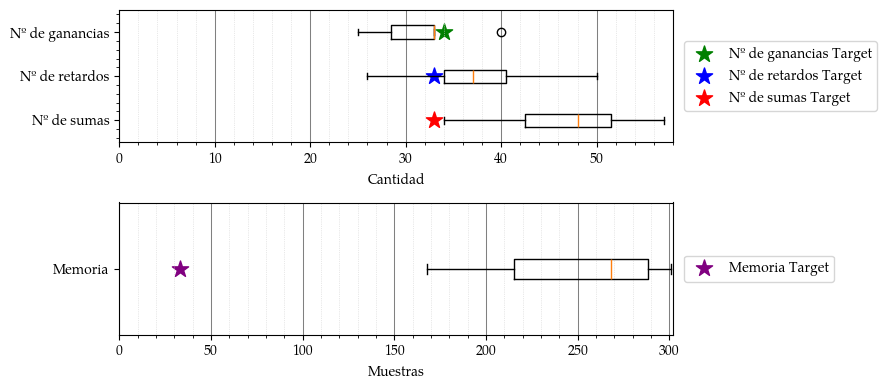

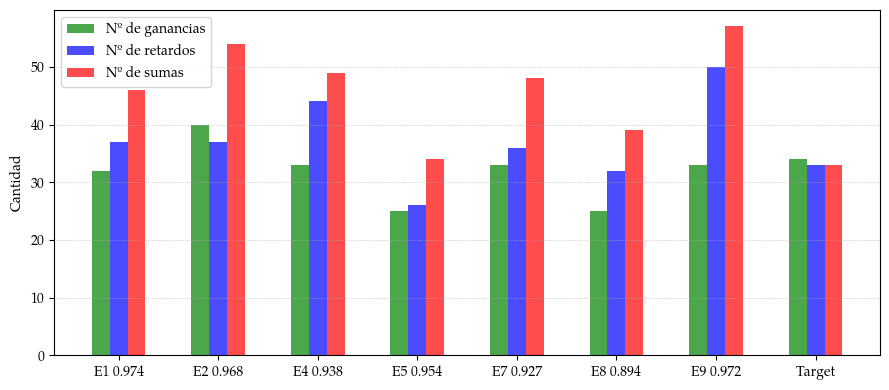

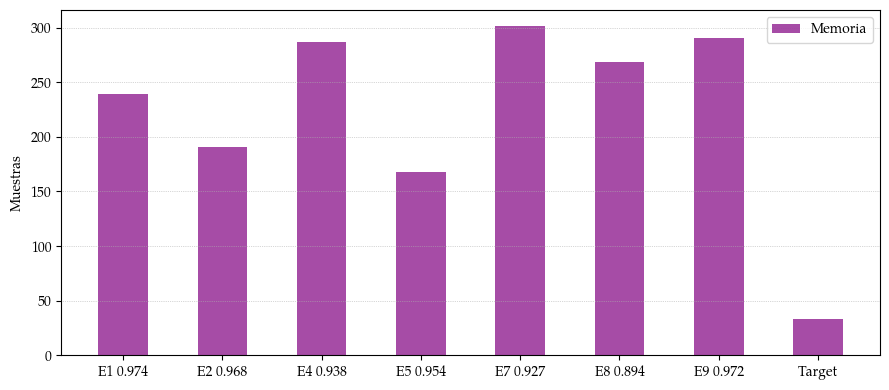

In [ ]:
# Synthetic target values

for r in chosenFilter:
    
    outFolderName = "graphs/"
    
    if r == filtersUsed[0]: # ALL_PASS_FILTER_4
        target_additions = 2
        target_gains = 2
        target_delays = 2
        target_memory = 8    
    elif r == filtersUsed[1]: # BIQUAD_LOWSHELF_3293_HZ
        target_additions = 4
        target_gains = 5
        target_delays = 2
        target_memory = 2    
    elif r == filtersUsed[2]: # BIQUAD_PEAK_440_HZ
        target_additions = 4 
        target_gains = 5
        target_delays = 2
        target_memory = 2
    elif r == filtersUsed[3]: # BIQUAD_PEAK_7753_HZ
        target_additions = 4
        target_gains = 5
        target_delays = 2
        target_memory = 2
    elif r == filtersUsed[4]: # FEEDBACK_COMB_FILTER_TOPOLOGY_1_ORDER_48
        target_additions = 1
        target_gains = 1
        target_delays = 1
        target_memory = 48
    elif r == filtersUsed[5]: # FEEDBACK_COMB_FILTER_TOPOLOGY_1_ORDER_7
        target_additions = 1
        target_gains = 1
        target_delays = 1
        target_memory = 7    
    elif r == filtersUsed[6]: # FEEDBACK_COMB_FILTER_TOPOLOGY_2_ORDER_11
        target_additions = 1
        target_gains = 1
        target_delays = 1
        target_memory = 11
    elif r == filtersUsed[7]: # FEEDBACK_COMB_FILTER_TOPOLOGY_2_ORDER_4        
        target_additions = 1
        target_gains = 1
        target_delays = 1
        target_memory = 4 
    elif r == filtersUsed[8]: # LOWPASS_33_TAPS
        target_additions = 33
        target_gains = 34
        target_delays = 33
        target_memory = 33

    fig, axs = plt.subplots(2, 1, figsize=(9, 4))

    # Plot Number of Gains, Number of Delays, Number of Additions together (first subplot)
    data = [numAdditions[r], numDelays[r], numGains[r]]
    tick_labels = ["Nº de sumas", "Nº de retardos", "Nº de ganancias"]
    axs[0].boxplot(data, tick_labels=tick_labels, vert=False, showfliers=True)
    print(f"Data for {r}: {data}")
    axs[0].set_xlabel("Cantidad", fontproperties=custom_font_prop)
    axs[0].grid(True, axis='x', which='major', linestyle='-', linewidth=0.75, color='gray')
    axs[0].grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='lightgray')
    axs[0].minorticks_on()
    # Set custom y-ticks at the center of each boxplot row
    axs[0].set_yticks([1, 2, 3])
    axs[0].set_yticklabels(tick_labels, fontproperties=custom_font_prop)
    axs[0].tick_params(axis='y', labelsize=10)
    axs[0].set_xlim(left=0, right=max(max(numAdditions[r]), max(numDelays[r]), max(numGains[r])) + 1)
    for label in axs[0].get_yticklabels():
        label.set_fontproperties(custom_font_prop)

    # Plot Memory Used separately (second subplot)
    axs[1].boxplot(memoryUsed[r], tick_labels=["Memoria"], vert=False, showfliers=True)
    axs[1].set_xlabel("Muestras", fontproperties=custom_font_prop)
    axs[1].grid(True, axis='x', which='major', linestyle='-', linewidth=0.75, color='gray')
    axs[1].grid(True, axis='x', which='minor', linestyle=':', linewidth=0.5, color='lightgray')
    axs[1].minorticks_on()

    # Overlay synthetic target values as markers (drawn last, on top)
    axs[0].scatter(target_additions, 1, marker='*', color='red', s=150, label='Nº de sumas Target')
    axs[0].scatter(target_delays, 2, marker='*', color='blue', s=150, label='Nº de retardos Target')
    axs[0].scatter(target_gains, 3, marker='*', color='green', s=150, label='Nº de ganancias Target')
    # Swap the order so gains is first, then delays, then additions
    handles, labels = axs[0].get_legend_handles_labels()
    # The order in scatter: additions (red, 1), delays (blue, 2), gains (green, 3)
    # We want: gains (green, 3), delays (blue, 2), additions (red, 1)
    order = [2, 1, 0]
    axs[0].legend([handles[i] for i in order], [labels[i] for i in order], loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)

    # Overlay synthetic target memory as marker (drawn last, on top)
    axs[1].scatter(target_memory, 1, marker='*', color='purple', s=150, label='Memoria Target')
    axs[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0)
    axs[1].set_xlim(left=0, right=max(memoryUsed[r]) + 1)

    plt.tight_layout()
    plt.savefig(outFolderName + f"{r}_boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()

    metrics = [
        ("Nº de ganancias", numGains[r], target_gains, 'green'),
        ("Nº de retardos", numDelays[r], target_delays, 'blue'),
        ("Nº de sumas", numAdditions[r], target_additions, 'red'),
    ]
    memory_metric = ("Memoria", memoryUsed[r], target_memory, 'purple')

    # Use the corresponding execution indices as xticks
    xticks = execution_labels + ["Target"]

    # Prepare data for grouped bar (metrics except memory)
    data = []
    for name, values, target, color in metrics:
        data.append(list(values) + [target])
    data = np.array(data)  # shape: (3, num_execs+1)

    # Prepare data for memory
    memory_values_with_target = list(memory_metric[1]) + [memory_metric[2]]

    x = np.arange(len(xticks))
    width = 0.18

    # Plot grouped bars for metrics except memory
    fig1, ax1 = plt.subplots(figsize=(9, 4))
    for i, (name, values, target, color) in enumerate(metrics):
        ax1.bar(x + (i - 1)*width, data[i], width, label=name, color=color, alpha=0.7)
    ax1.set_ylabel("Cantidad", fontproperties=custom_font_prop)
    ax1.legend()
    ax1.grid(axis='y', linestyle=':', linewidth=0.5)
    ax1.set_xticks(x)
    ax1.set_xticklabels(xticks, rotation=0, ha='center', fontproperties=custom_font_prop)
    plt.tight_layout()
    plt.savefig(outFolderName + f"{r}_bar.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Plot memory separately
    fig2, ax2 = plt.subplots(figsize=(9, 4))
    ax2.bar(x, memory_values_with_target, width=0.5, color=memory_metric[3], alpha=0.7)
    ax2.set_ylabel("Muestras", fontproperties=custom_font_prop)
    ax2.legend([memory_metric[0]], loc='upper right')
    ax2.grid(axis='y', linestyle=':', linewidth=0.5)
    ax2.set_xticks(x)
    ax2.set_xticklabels(xticks, rotation=0, ha='center', fontproperties=custom_font_prop)
    plt.tight_layout()
    plt.savefig(outFolderName + f"{r}_bar_memory.png", dpi=300, bbox_inches='tight')
    plt.show()


## Señal de entrada

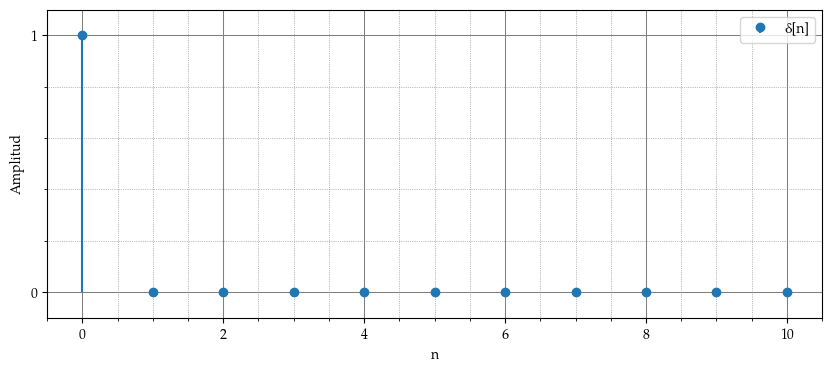

In [11]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(0, 11, 1)
signal = np.zeros(11)
signal[0] = 1  # Dirac delta function at n=5


plt.figure(figsize=(10, 4))
markerline, stemlines, baseline = plt.stem(n, signal)
baseline.set_visible(False)  # Hide the baseline
plt.xlabel("n")
plt.xlim(-0.5, 10.5)
plt.yticks([0, 1], ['0', '1'])
plt.ylabel("Amplitud")
plt.ylim(-0.1, 1.1)
plt.grid(True, which='major', linestyle='-', linewidth=0.75, color='gray')
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
plt.minorticks_on()
plt.legend(["δ[n]"], loc='upper right', prop=custom_font_prop)
plt.savefig("graphs/DiracInput.png", dpi=300, bbox_inches='tight')